In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
np.set_printoptions(threshold=np.inf)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocessing

dimensi gambar: (638, 813)
518694


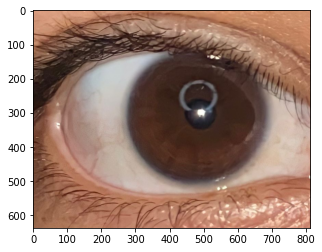

In [3]:
#read image
gambar = cv2.imread('/content/drive/MyDrive/winny 1.jpeg')
bgr = cv2.cvtColor(gambar,cv2.COLOR_RGB2BGR)
dimensi = gambar[:,:,0]
print('dimensi gambar:',dimensi.shape)
print(dimensi.size)
plt.imshow(bgr)
plt.show()

In [4]:
#print as array
# print(np.array(dimensi))

(638, 813)


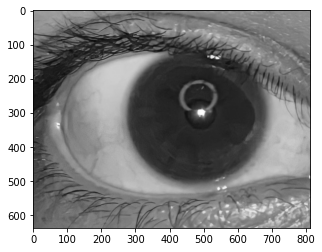

In [5]:
gray = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)
# dimensi2 = gray[:,:,0]
print(gray.shape)
plt.imshow(bgr)
plt.show()

In [ ]:
#print as array
# print(np.array(gray))
gray_dim = np.array(gray)
df = pd.DataFrame(gray_dim)
writer = df.to_excel('TA.xlsx', sheet_name='grayscale', header=False, index=False, index_label=None, startrow=0, startcol=0)

Canny Edge Detection

(638, 813)


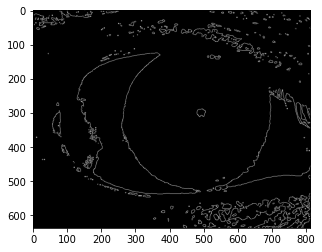

In [6]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
canny = cv2.Canny(thresh,50,100)
dim = cv2.cvtColor(canny, cv2.COLOR_RGB2BGR)
print(canny.shape)
plt.imshow(dim)
plt.show()

In [ ]:
# print(np.array(canny))

In [ ]:
dimensi = np.asarray(canny)

# Create a Pandas dataframe from the data.
df = pd.DataFrame(dimensi)
writer = df.to_excel('canny.xlsx', sheet_name='Canny', header=False, index=False, index_label=None, startrow=0, startcol=0)

Hough Transform

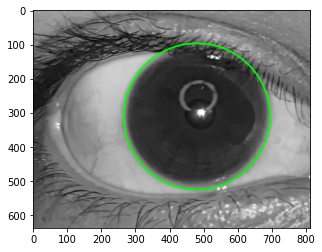

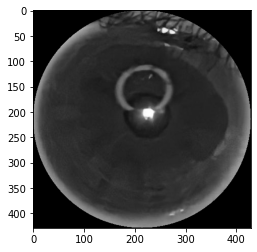

In [8]:
# circles = cv2.HoughCircles(canny,cv2.HOUGH_GRADIENT,1,10000,param1=50,param2=30,minRadius=50,maxRadius=100)
circles = cv2.HoughCircles(canny,cv2.HOUGH_GRADIENT,1,10000,param1=50,param2=30,minRadius=0,maxRadius=1000)

height,width = gray.shape
r = 0
mask = np.zeros((height,width), np.uint8)
for i in circles[0,:]:
    cv2.circle(bgr, (int(i[0]), int(i[1])), (int(i[2])), (0, 255, 0),3)
    cv2.circle(mask, (int(i[0]), int(i[1])), (int(i[2])), (255,255,255),thickness=-1)
    blank_image = bgr[:int(i[1]),:int(i[1])]

    masked_data = cv2.bitwise_and(gray, gray, mask=mask)
    _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    x,y,w,h = cv2.boundingRect(contours[0][0])
    crop = masked_data[y:y+h,x:x+w]
    r = i[2]
    crop_dim =cv2.cvtColor(crop, cv2.COLOR_RGB2BGR)

plt.imshow(bgr)
plt.show()
plt.imshow(crop_dim)
plt.savefig('Hough Transform')
plt.show()